In [1]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.fftpack as fftpack
import glob
import os
import librosa
from librosa import display

In order to run this notebook audio files should be put under data folder.

In [2]:
fs, esg = read('data/esg/esg_4.wav')
fs1,ilber = read('data/ilber/ilber_19.wav')

# Part A

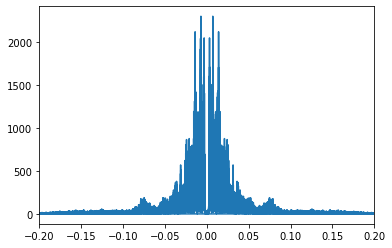

In [3]:
def dtft_magnitude_plotter(signal):
    ft = np.fft.fft(signal/max(abs(signal)))
    freq = np.fft.fftfreq(len(signal))
    plt.xlim(-0.2,0.2)
    plt.plot(freq,(ft.real**2 + ft.imag**2)**0.5)   
dtft_magnitude_plotter(esg[:,0])

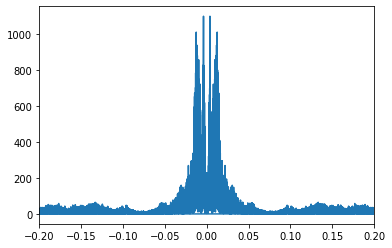

In [4]:
ft = np.fft.fft(ilber[:,0]/max(abs(ilber[:,0])))
freq = np.fft.fftfreq(220501)
plt.xlim(-0.2,0.2)
plt.plot(freq, (ft.real**2 + ft.imag**2)**0.5)

# Part B

In [5]:
n_fft = 2048
hop_length = 512

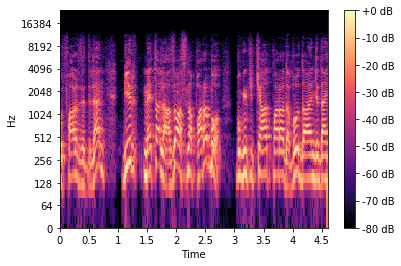

In [6]:
 # Spectogram of ESG
esg_d = np.abs(librosa.stft(esg[:,0]/1.0, n_fft=n_fft, hop_length=hop_length))
DB_esg = librosa.amplitude_to_db(esg_d, ref=np.max)
librosa.display.specshow(DB_esg, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

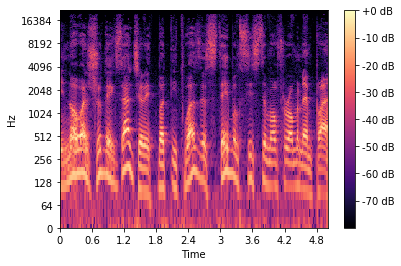

In [7]:
#Spectogram of Ilber
hop_length = 512
ilber_d = np.abs(librosa.stft(ilber[:,0]/1.0, n_fft=n_fft, hop_length=hop_length))
DB_ilber = librosa.amplitude_to_db(ilber_d, ref=np.max)
librosa.display.specshow(DB_ilber, sr=fs1, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [8]:
#data analysis
path = os.getcwd()
esg_dir=glob.glob(path+"/data/esg/*.wav")
for i,file in enumerate(esg_dir):
    fs, esg = read(file)
    esg_1 = esg[:,0]
     
    D = np.abs(librosa.stft(esg_1/1.0, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(esg_d, ref=np.max)
    print(D.mean())

21341.18
15915.927
20362.068
21114.082
19973.7
21124.92
22215.783
22402.643
19921.357
17885.562
24361.268
22057.752
19921.24
20417.572
24238.262
20463.297
21742.734
20543.01
20931.088
21147.057
22036.127
21564.238
20421.441
21062.996
20348.547
21960.94
15702.382
19628.523
21582.97
22082.873
18525.578


In [9]:
path = os.getcwd()
ilber_dir=glob.glob(path+"/data/ilber/*.wav")
for i,file in enumerate(ilber_dir):
    fs, ilber = read(file)
    ilber_1 = ilber[:,0]    
    D = np.abs(librosa.stft(ilber_1/1.0, n_fft=n_fft, hop_length=hop_length))
    print(D.mean())

8712.034
6008.1025
6354.919
5243.044
4508.1177
6752.281
6100.6606
8778.521
4818.222
5451.358
9021.543
5419.9844
4192.9546
4243.3374
7978.194
4413.267
4347.7344
6812.594
5424.0703
9240.943
5426.034
6495.7407
8743.352
4305.643
4464.426
7055.04
6366.362
6911.73
8079.018
5564.6255
4254.52
3668.6045
7723.0776
6325.442
5435.6514
10584.343
7734.6694
5134.3657
4267.9565


In [35]:
path = os.getcwd()
test_dir=glob.glob(path+"/data/test/*.wav")
predicts=[]
for i,file in enumerate(test_dir):
    fs, data = read(file)
    data = data[:,0]   
    D = np.abs(librosa.stft(data/1.0, n_fft=n_fft, hop_length=hop_length))
    if(D.mean()>13000):
        predicts.append([file.split("/")[-1],"esg"])
    else:
        predicts.append([file.split("/")[-1],"ilber"])


In [36]:
score=0
for i in range(len(predicts)):
    if(predicts[i][0].split("_")[0]==predicts[i][1]):
        score+=1
print("Test accuracy is % {} ".format(100*score/len(predicts)))

Test accuracy is % 100.0 
